In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [31]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [32]:
df = df[["Country", "Gender", "Age", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,Gender,Age,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,Man,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,Man,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,NaN,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [33]:
df = df[df["Salary"].notnull()]
df = df[df["Age"].notnull()]
df = df[df["Age"]!="Prefer not to say"]
df = df[df["Gender"].notnull()]
df = df[df["Gender"]!="Prefer not to say"]
df.head()

,Country,Gender,Age,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,Man,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,Man,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,Woman,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,Man,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,Man,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37546 entries, 2 to 73119
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37546 non-null  object 
 1   Gender        37546 non-null  object 
 2   Age           37546 non-null  object 
 3   EdLevel       37531 non-null  object 
 4   YearsCodePro  37417 non-null  object 
 5   Employment    37542 non-null  object 
 6   Salary        37546 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.3+ MB


In [35]:
df = df.dropna()
df.isnull().sum()

Country         0
Gender          0
Age             0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [36]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30954 entries, 2 to 73119
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30954 non-null  object 
 1   Gender        30954 non-null  object 
 2   Age           30954 non-null  object 
 3   EdLevel       30954 non-null  object 
 4   YearsCodePro  30954 non-null  object 
 5   Salary        30954 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


In [37]:
df['Country'].value_counts()

Country
United States of America                                7718
Germany                                                 2360
United Kingdom of Great Britain and Northern Ireland    2291
India                                                   1857
Canada                                                  1223
                                                        ... 
Yemen                                                      1
Zambia                                                     1
Monaco                                                     1
Saint Lucia                                                1
Seychelles                                                 1
Name: count, Length: 154, dtype: int64

In [38]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [39]:
country_map = shorten_categories(df.Country.value_counts(), 350)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                                                   8190
United States of America                                7718
Germany                                                 2360
United Kingdom of Great Britain and Northern Ireland    2291
India                                                   1857
Canada                                                  1223
France                                                  1112
Brazil                                                  1010
Spain                                                    845
Netherlands                                              689
Australia                                                689
Italy                                                    659
Poland                                                   569
Sweden                                                   551
Russian Federation                                       421
Switzerland                                              412
Turkey          

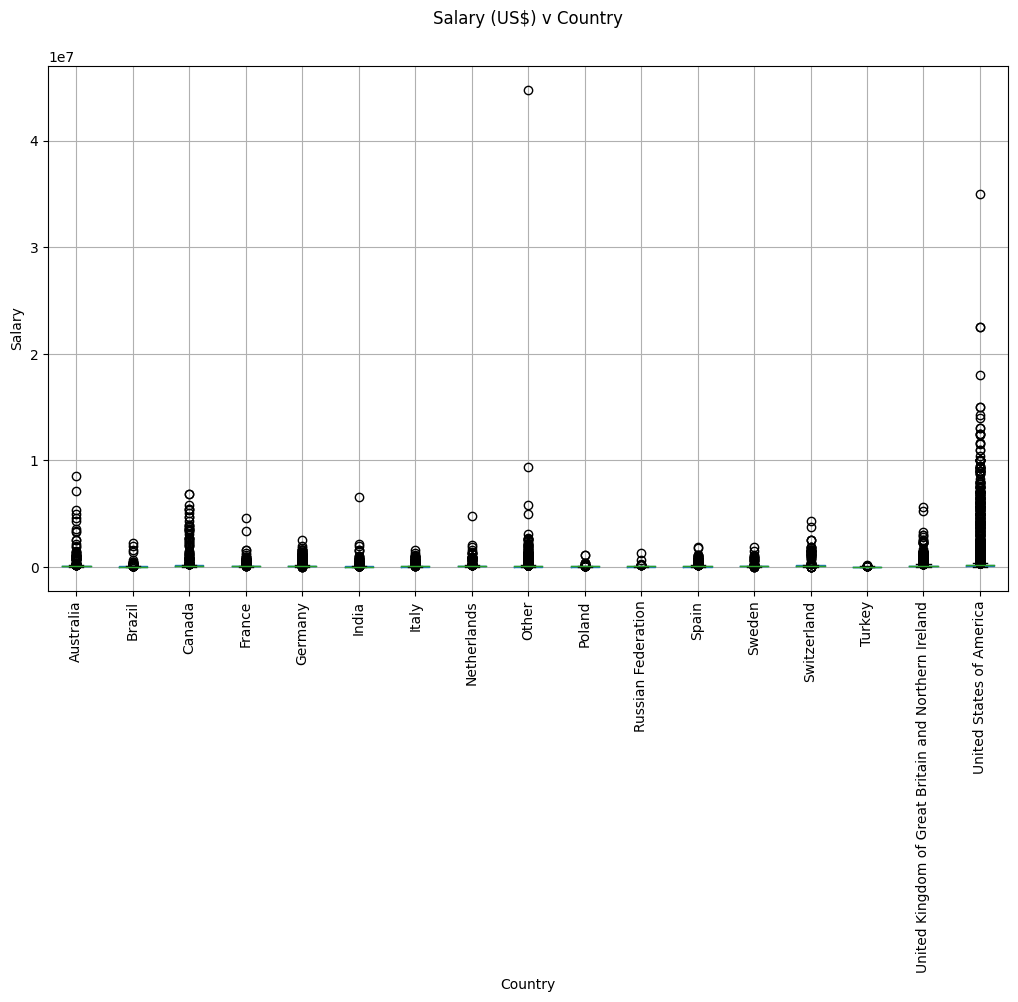

In [40]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [41]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

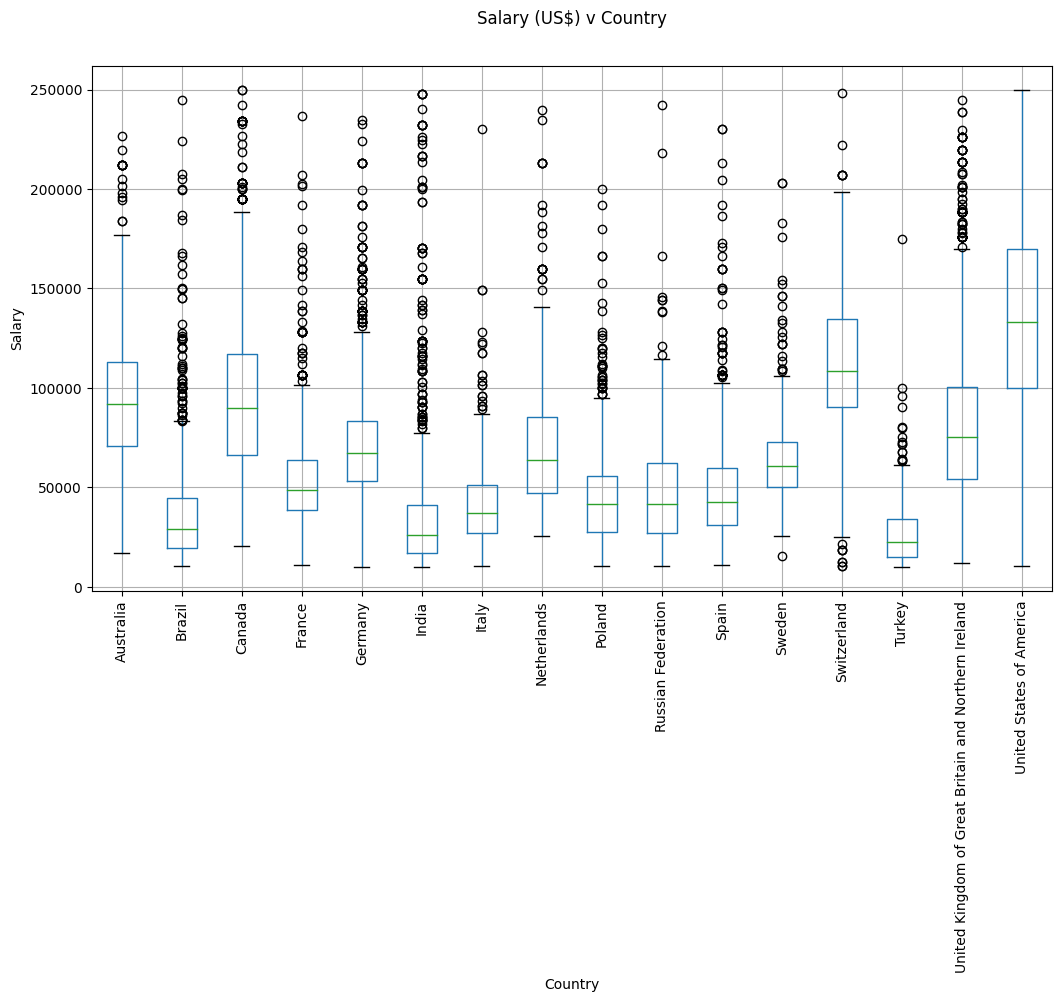

In [42]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [43]:
df.Gender.value_counts()

Gender
Man                                                                                   18392
Woman                                                                                  1017
Non-binary, genderqueer, or gender non-conforming                                       221
Man;Non-binary, genderqueer, or gender non-conforming                                    81
Woman;Non-binary, genderqueer, or gender non-conforming                                  54
Or, in your own words:                                                                   49
Man;Or, in your own words:                                                               28
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming                  7
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming        4
Man;Woman;Non-binary, genderqueer, or gender non-conforming                               4
Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-confo

In [44]:
def clean_gender(x):
    if x ==  'Man':
        return 'Man'
    if x == 'Woman':
        return 'Woman'
    else: 
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

In [45]:
df.Gender.value_counts()

Gender
Man      18392
Woman     1017
Other      457
Name: count, dtype: int64

In [46]:
df["YearsCodePro"].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [47]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [48]:
df["YearsCodePro"].unique()

array([ 5. ,  6. ,  2. ,  4. , 20. ,  9. , 14. , 21. , 15. , 25. ,  3. ,
       10. ,  8. , 12. ,  7. , 19. , 17. , 24. ,  1. , 11. , 23. ,  0.5,
       18. , 37. , 46. , 22. , 32. , 13. , 27. , 28. , 16. , 31. , 34. ,
       35. , 26. , 42. , 38. , 30. , 36. , 40. , 41. , 29. , 33. , 39. ,
       48. , 45. , 44. , 43. , 50. , 47. , 49. ])

In [49]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [50]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [51]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [52]:
df["Age"].unique()

array(['25-34 years old', '18-24 years old', '35-44 years old',
       '55-64 years old', '45-54 years old', '65 years or older',
       'Under 18 years old'], dtype=object)

In [53]:
# One-hot encoding of columns "Country", "Age", "EdLevel"
df = pd.get_dummies(df, columns=['Country'], prefix='Country')
df = pd.get_dummies(df, columns=['Age'], prefix='Age')
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')
df = pd.get_dummies(df, columns=['EdLevel'], prefix='EdLevel')
df.head()

,YearsCodePro,Salary,Country_Australia,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Italy,Country_Netherlands,...,Age_55-64 years old,Age_65 years or older,Age_Under 18 years old,Gender_Man,Gender_Other,Gender_Woman,EdLevel_Bachelor’s degree,EdLevel_Less than a Bachelors,EdLevel_Master’s degree,EdLevel_Post grad
2,5.0,40205.0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
8,6.0,49056.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
10,2.0,60307.0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
12,5.0,65000.0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
21,4.0,34126.0,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [54]:
# Define a list of Boolean column to convert
bool_columns = ['Age_18-24 years old', 'Age_25-34 years old', 'Age_35-44 years old',
                'Age_45-54 years old', 'Age_55-64 years old', 'Age_65 years or older',
                'Age_Under 18 years old', 'Gender_Man', 'Gender_Woman', 'Gender_Other',
                'Country_Australia', 'Country_Brazil', 'Country_Canada',
                'Country_France', 'Country_Germany', 'Country_India',
                'Country_Italy', 'Country_Netherlands', 'Country_Poland', 'Country_Russian Federation',
                'Country_Spain', 'Country_Sweden', 'Country_Switzerland',
                'Country_United Kingdom of Great Britain and Northern Ireland',
                'Country_United States of America', 'EdLevel_Bachelor’s degree',
                'EdLevel_Less than a Bachelors', 'EdLevel_Master’s degree', 'EdLevel_Post grad']

# Convert boolean columns to floats
df[bool_columns] = df[bool_columns].astype(float)
df.head()


,YearsCodePro,Salary,Country_Australia,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Italy,Country_Netherlands,...,Age_55-64 years old,Age_65 years or older,Age_Under 18 years old,Gender_Man,Gender_Other,Gender_Woman,EdLevel_Bachelor’s degree,EdLevel_Less than a Bachelors,EdLevel_Master’s degree,EdLevel_Post grad
2,5.0,40205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,6.0,49056.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10,2.0,60307.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12,5.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
21,4.0,34126.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
X, y = df[['Age_18-24 years old', 'Age_25-34 years old', 'Age_35-44 years old',
                'Age_45-54 years old', 'Age_55-64 years old', 'Age_65 years or older',
                'Age_Under 18 years old', 'Gender_Man', 'Gender_Woman', 'Gender_Other',
                'Country_Australia', 'Country_Brazil', 'Country_Canada',
                'Country_France', 'Country_Germany', 'Country_India',
                'Country_Italy', 'Country_Netherlands', 'Country_Poland', 'Country_Russian Federation',
                'Country_Spain', 'Country_Sweden', 'Country_Switzerland',
                'Country_United Kingdom of Great Britain and Northern Ireland',
                'Country_United States of America', 'EdLevel_Bachelor’s degree',
                'EdLevel_Less than a Bachelors', 'EdLevel_Master’s degree', 'EdLevel_Post grad', 'YearsCodePro']], df['Salary']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
import joblib

# Save data
dati = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
joblib.dump(dati, 'data/dati.pkl')

['data/dati.pkl']

In [58]:
X_train.head()

,Age_18-24 years old,Age_25-34 years old,Age_35-44 years old,Age_45-54 years old,Age_55-64 years old,Age_65 years or older,Age_Under 18 years old,Gender_Man,Gender_Woman,Gender_Other,...,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,EdLevel_Bachelor’s degree,EdLevel_Less than a Bachelors,EdLevel_Master’s degree,EdLevel_Post grad,YearsCodePro
1229,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0
3623,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
64298,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,25.0
53332,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
71548,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0


In [59]:
y_train.head()

1229     90000.0
3623     10834.0
64298    83000.0
53332    36072.0
71548    70276.0
Name: Salary, dtype: float64

In [60]:
X_train.shape

(15892, 30)

In [61]:
import tensorflow as tf
from tensorflow import keras as k

model = k.Sequential([
    k.layers.Dense(64, activation=k.activations.relu, input_shape=[30]),
    k.layers.Dense(64, activation=k.activations.relu),
    k.layers.Dense(32, activation=k.activations.relu),
    k.layers.Dense(1, activation=None)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8257 (32.25 KB)
Trainable params: 8257 (32.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model.compile(optimizer=k.optimizers.Adam(), loss=k.losses.mean_squared_error, metrics=[k.metrics.mean_absolute_error])

In [63]:
# Model Training
epochs=100
model.fit(X_train, y_train, epochs=epochs, batch_size=10)


Epoch 1/100
1590/1590 [==============================] - 1s 432us/step - loss: 3865381888.0000 - mean_absolute_error: 45959.6367
Epoch 2/100
1590/1590 [==============================] - 1s 492us/step - loss: 1533195904.0000 - mean_absolute_error: 29824.9629
Epoch 3/100
1590/1590 [==============================] - 1s 458us/step - loss: 1315655936.0000 - mean_absolute_error: 26587.4844
Epoch 4/100
1590/1590 [==============================] - 1s 455us/step - loss: 1302962944.0000 - mean_absolute_error: 26242.1250
Epoch 5/100
1590/1590 [==============================] - 1s 463us/step - loss: 1300033024.0000 - mean_absolute_error: 26202.0996
Epoch 6/100
1590/1590 [==============================] - 1s 461us/step - loss: 1298033920.0000 - mean_absolute_error: 26109.4297
Epoch 7/100
1590/1590 [==============================] - 1s 551us/step - loss: 1296599680.0000 - mean_absolute_error: 26126.9629
Epoch 8/100
1590/1590 [==============================] - 1s 462us/step - loss: 1293815168.0000 - 

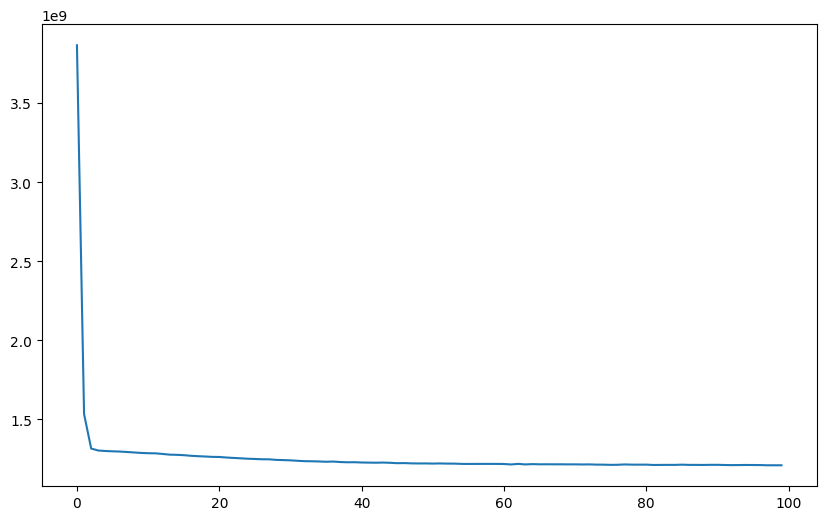

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(epochs), model.history.history['loss'])
plt.grid=True

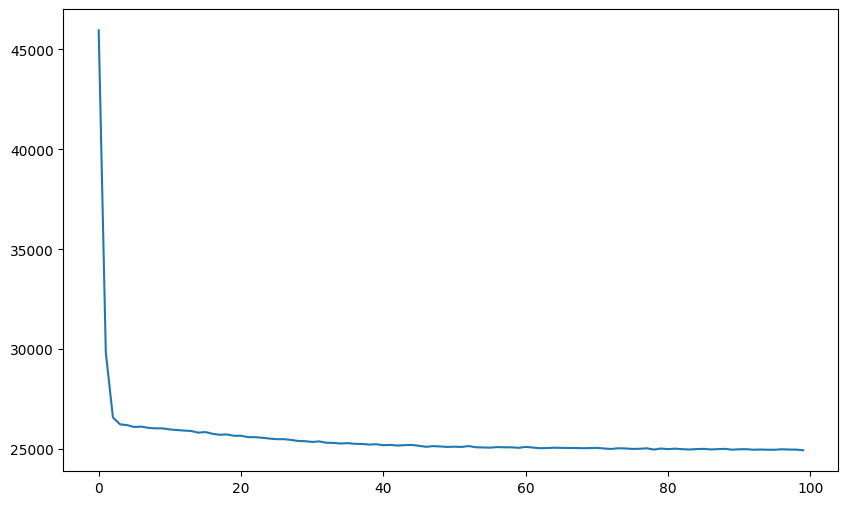

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(epochs), model.history.history['mean_absolute_error'])
plt.grid=True

In [66]:
# 64/64/32 - 100 - 10 - 508us/step - loss: 1165292544.0000 - mean_absolute_error: 24390.3750

model.evaluate(X_test, y_test)

125/125 [==============================] - 0s 354us/step - loss: 1159795328.0000 - mean_absolute_error: 24662.0859


[1159795328.0, 24662.0859375]

In [67]:
predictions = model.predict(X_test)

125/125 [==============================] - 0s 284us/step


In [68]:
print(y_test.values[0])

61908.0


In [69]:
c=0
c1 = 0

for i in range(len(predictions)):
    c += abs(predictions[i] - y_test.values[i])
    c1 += y_test.values[i]

mpe = (c/c1)*100
stima = 100 - mpe[0]
print("La stima è approssimativamente corretta al:", stima, "%")


La stima è approssimativamente corretta al: 72.14871025085449 %


In [70]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Salario Predetto': predictions[:, 0]})

# Verify that the number of rows in predictions_df is equal to the number of elements in y_test
if len(predictions_df) == len(y_test):
    # Add the "Salario Reale" column from y_test
    predictions_df['Salario Reale'] = y_test.values
else:
    print("Il numero di righe in predictions_df non corrisponde al numero di elementi in y_test.")

In [71]:
predictions_df

,Salario Predetto,Salario Reale
0,26261.101562,61908.0
1,79295.078125,69318.0
2,83592.640625,95979.0
3,111173.750000,86000.0
4,83499.281250,106194.0
...,...,...
3969,150867.968750,160000.0
3970,134551.843750,110000.0
3971,45438.066406,40464.0
3972,164880.781250,180000.0


In [72]:
# Save trained model
model.save("tensorflow_model.h5")

/Users/niccoloerasmi/Desktop/CC_Project/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_lr = LinearRegression()

# Model Training
model_lr.fit(X_train, y_train)

# Make predictions on test data
y_pred = model_lr.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 1222393139.4335682
Mean Absolute Error: 25601.99370910921
R-squared: 0.5763776727149877


In [74]:
# Decision Trees

from sklearn.tree import DecisionTreeRegressor

# Create Decision Trees Model
model_dtr = DecisionTreeRegressor(max_depth=10, random_state=42)

# Model Training
model_dtr.fit(X_train, y_train)

# Make predictions on test data
y_pred = model_dtr.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 1284118089.1848161
Mean Absolute Error: 25970.688673164317
R-squared: 0.5549867911551563


In [75]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

# Create Random Forest Model
model_rfr = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42)

# Model Training
model_rfr.fit(X_train, y_train)

# Make predictions on test data
y_pred = model_rfr.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 1212950940.7007453
Mean Absolute Error: 25335.24427410058
R-squared: 0.5796498820172582
